<a href="https://colab.research.google.com/github/ShubhaShreeKrishnan/PRODIGY/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_data = pd.read_csv('/content/train (1).csv')  # Update the path to your dataset


In [9]:
# Display the first few rows
titanic_data.head()

# Display basic statistics
titanic_data.describe()

# Information about the dataset
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Check for missing values
titanic_data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# Fill missing Age values with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column
titanic_data.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled
titanic_data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# Check for duplicates
titanic_data.duplicated().sum()

# Remove duplicates if any
titanic_data.drop_duplicates(inplace=True)


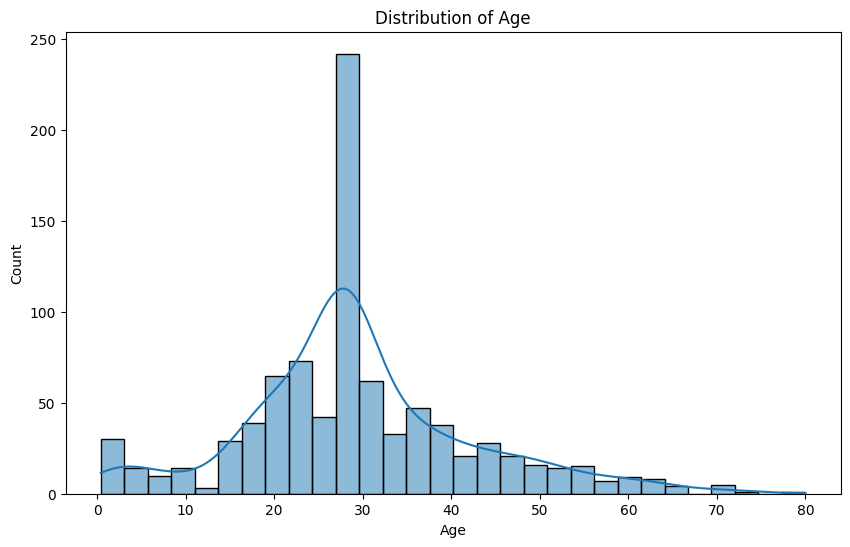

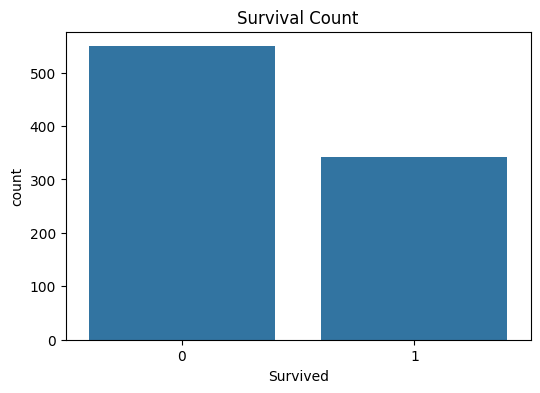

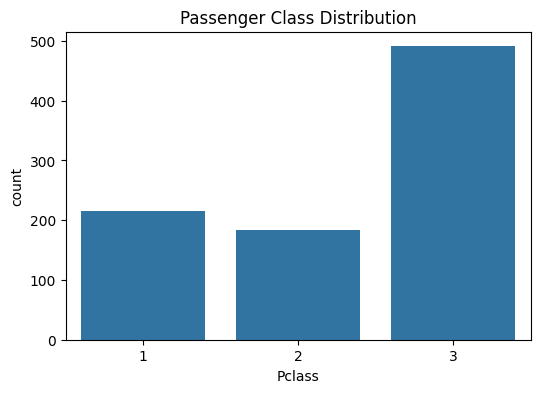

In [13]:
# Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

# Distribution of 'Pclass'
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Distribution')
plt.show()


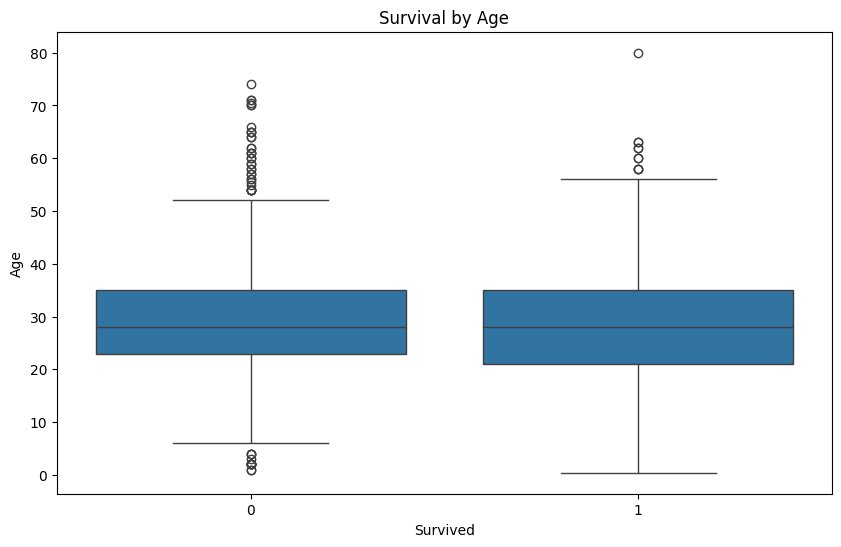

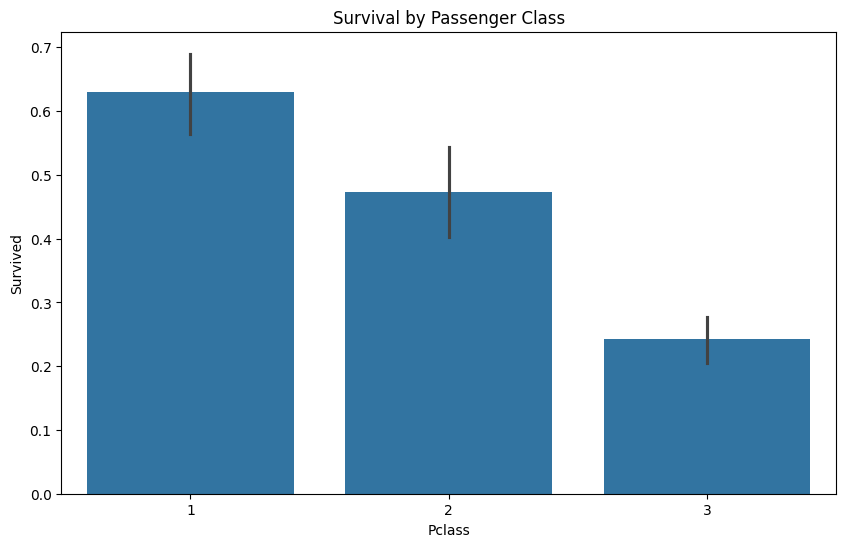

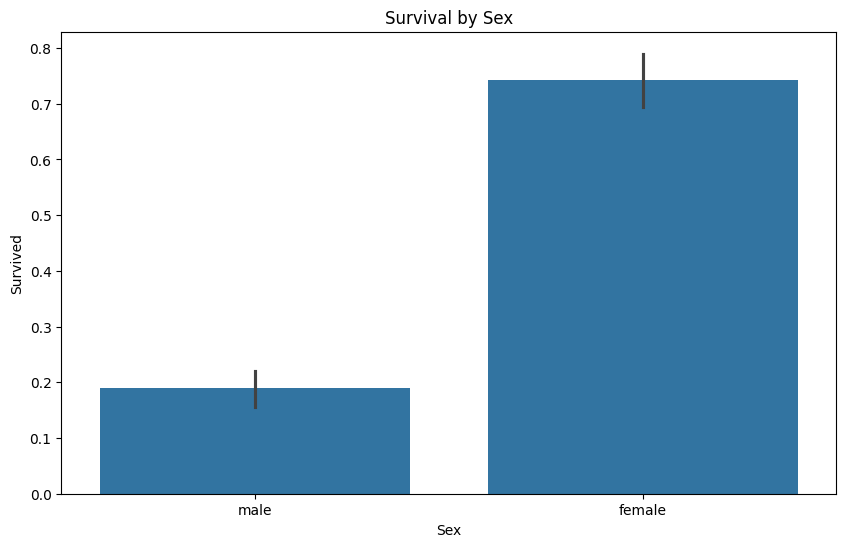

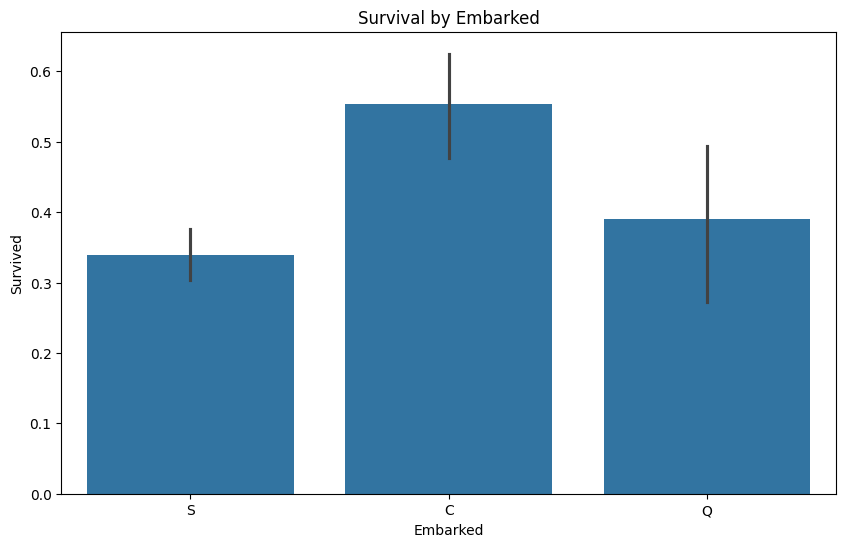

In [14]:
# Survival by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Survival by Age')
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.show()

# Survival by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival by Sex')
plt.show()

# Survival by Embarked
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=titanic_data)
plt.title('Survival by Embarked')
plt.show()


<Figure size 1400x700 with 0 Axes>

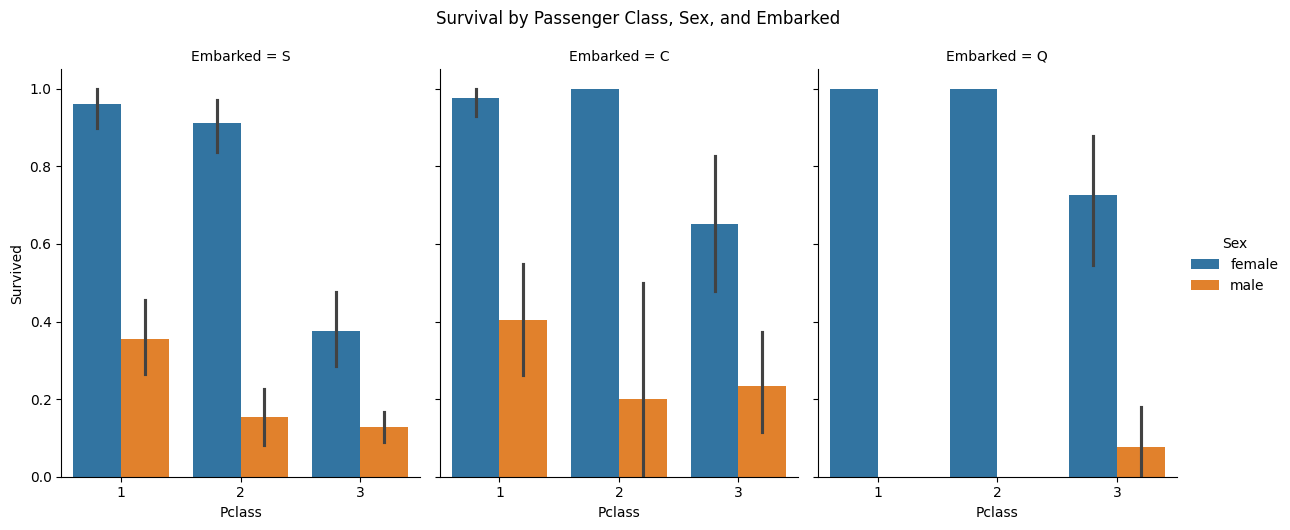

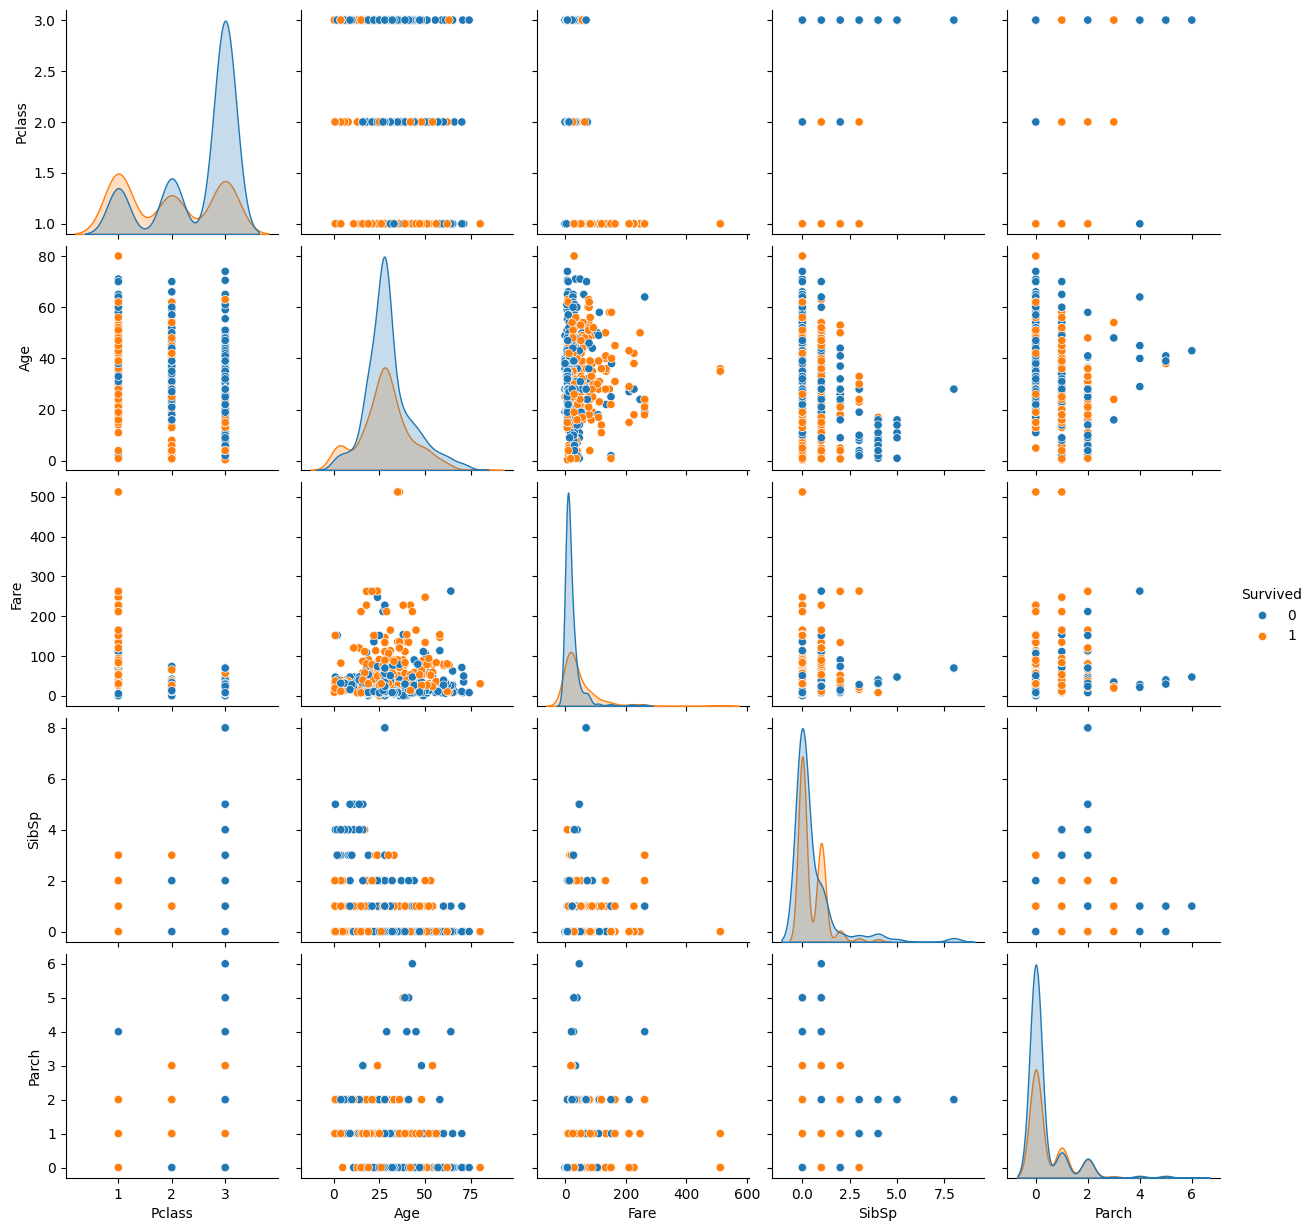

In [15]:
# Survival by Passenger Class, Sex, and Embarked
plt.figure(figsize=(14, 7))
sns.catplot(x='Pclass', hue='Sex', col='Embarked', y='Survived', data=titanic_data, kind='bar', height=5, aspect=0.8)
plt.suptitle('Survival by Passenger Class, Sex, and Embarked', y=1.05)
plt.show()

# Pairplot to visualize relationships
sns.pairplot(titanic_data[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].dropna(), hue='Survived')
plt.show()


In [16]:
# Save the cleaned dataset
titanic_data.to_csv('cleaned_titanic_data.csv', index=False)
